# Cricket analysis: 
 T-20 World Cup 2022 Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [2]:
df = pd.read_csv(r"C:\Users\NTC\Downloads\T-20 World cup 2022.csv")

 1. Data Exploration
 Explore match details

In [3]:
print("Match details:")
print(df[['match_id', 'home_team', 'away_team',
      'innings_id', 'runs']].head())

Match details:
   match_id home_team away_team  innings_id  runs
0   1298179       PAK       ENG           1     0
1   1298179       PAK       ENG           1     1
2   1298179       PAK       ENG           1     1
3   1298179       PAK       ENG           1     2
4   1298179       PAK       ENG           1     0


Explore player statistics

In [4]:
print("\nPlayer statistics:")
print(df[['batsman1_name', 'batsman1_runs', 'batsman1_balls']].head())


Player statistics:
     batsman1_name  batsman1_runs  batsman1_balls
0  Mohammad Rizwan              0               2
1  Mohammad Rizwan              0               1
2  Mohammad Rizwan              0               1
3  Mohammad Rizwan              2               3
4  Mohammad Rizwan              2               4


Explore match events

In [5]:
print("\nMatch events:")
print(df[['match_id', 'match_name', 'shortText']].head())


Match events:
   match_id match_name                             shortText
0   1298179  ENG v PAK     Stokes to Mohammad Rizwan, no run
1   1298179  ENG v PAK     Stokes to Mohammad Rizwan, 1 wide
2   1298179  ENG v PAK  Stokes to Mohammad Rizwan, 1 no ball
3   1298179  ENG v PAK     Stokes to Mohammad Rizwan, 2 runs
4   1298179  ENG v PAK     Stokes to Mohammad Rizwan, no run


2. In-Depth Analysis
Player statistics

In [6]:
player_stats = df.groupby('batsman1_name').agg(
    {'batsman1_runs': 'sum', 'batsman1_balls': 'sum'})
print("\nPlayer statistics summary:")
print(player_stats.head())


Player statistics summary:
                  batsman1_runs  batsman1_balls
batsman1_name                                  
Aaron Finch                2169            2226
Aayan Afzal Khan            251             259
Adam Zampa                    1               4
Afif Hossain               1051             844
Aiden Markram              1245            1133


Over-by-over progress

In [7]:
print("\nOver-by-over progress summary:")
print(df.groupby('innings_id')['runs'].value_counts())


Over-by-over progress summary:
innings_id  runs
1           1       2119
            0       1789
            2        490
            4        483
            6        179
            3         55
            5          6
            7          4
2           0       1825
            1       1804
            4        434
            2        412
            6        145
            3         56
            5         11
            7          2
Name: count, dtype: int64


3. Event Inference
 Identify critical match events

In [8]:
critical_events = df[df['match_name'].isin(
    ['batsman1_balls', 'batsman1_runs'])]
print("\nCritical match events:")
print(critical_events[['match_id', 'match_name', 'shortText']].head())


Critical match events:
Empty DataFrame
Columns: [match_id, match_name, shortText]
Index: []


 4. Performance Evaluation
Individual player performance

In [9]:
print("\nTop run-scorers:")
print(player_stats.sort_values(by='batsman1_runs', ascending=False).head())

print("\nTop wicket-takers:")
print(player_stats.sort_values(by='batsman1_balls', ascending=False).head())


Top run-scorers:
                 batsman1_runs  batsman1_balls
batsman1_name                                 
Virat Kohli               5615            4792
Pathum Nissanka           5094            4356
Max O'Dowd                4491            4109
Glenn Phillips            4408            2965
Jos Buttler               4326            3062

Top wicket-takers:
                       batsman1_runs  batsman1_balls
batsman1_name                                       
Virat Kohli                     5615            4792
Pathum Nissanka                 5094            4356
Max O'Dowd                      4491            4109
Najmul Hossain Shanto           3643            3370
Jos Buttler                     4326            3062


 5. Statistical Insights
Example: Average runs scored per innings

In [10]:
avg_runs_per_innings = df.groupby('innings_id')['batsman1_runs'].mean()
print("\nAverage runs scored per innings:")
print(avg_runs_per_innings)


Average runs scored per innings:
innings_id
1    16.926049
2    14.343144
Name: batsman1_runs, dtype: float64


 Create visualizations using Matplotlib or Seaborn libraries

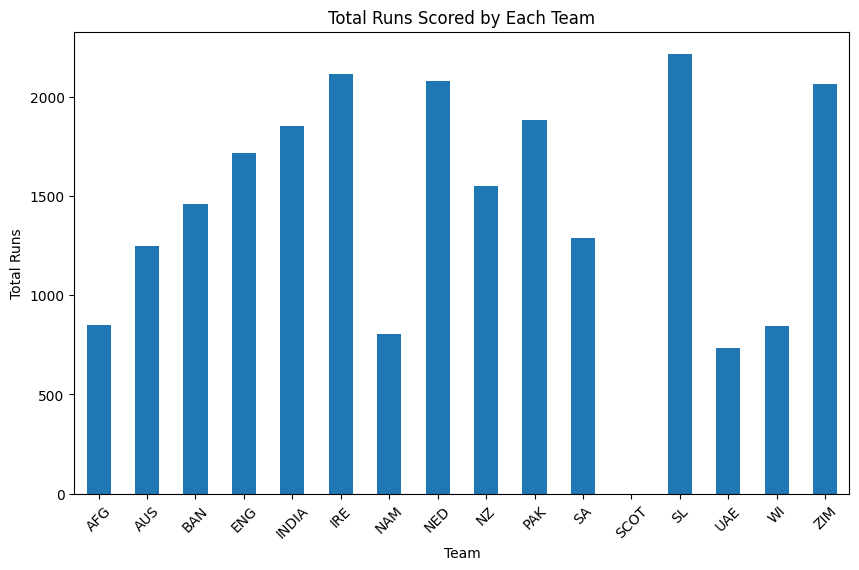

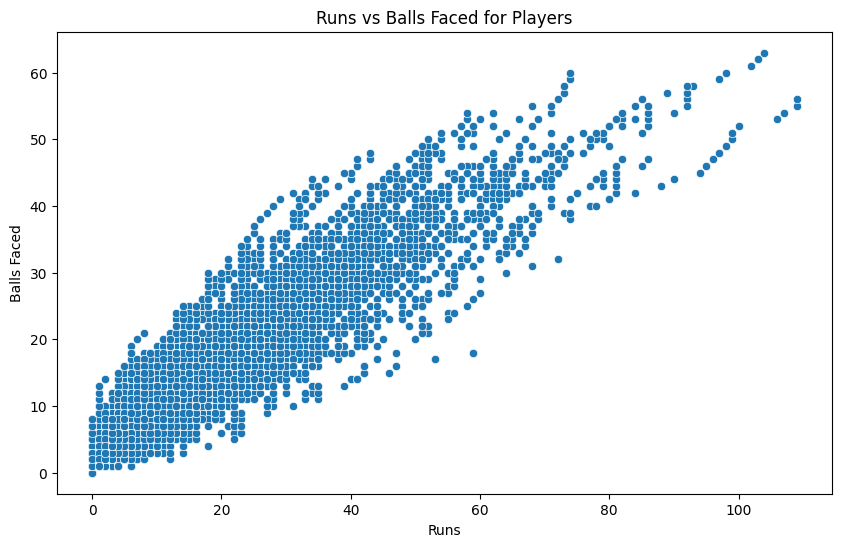

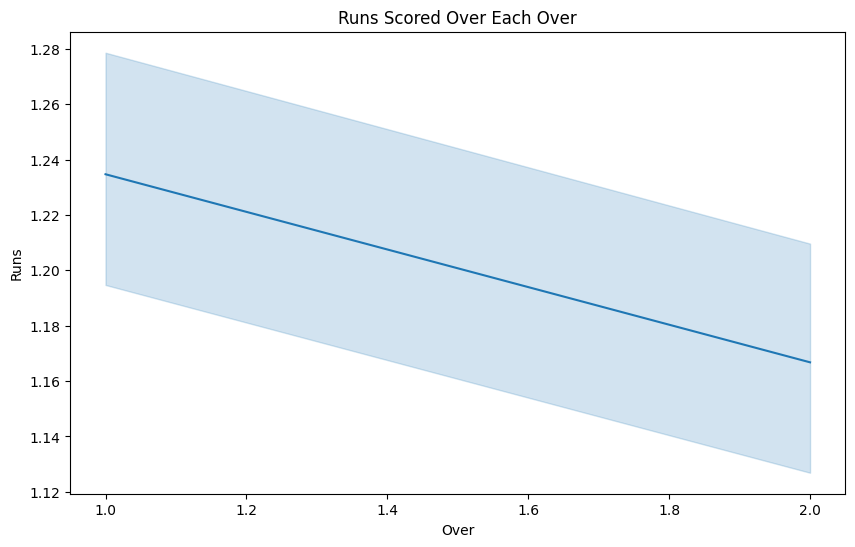

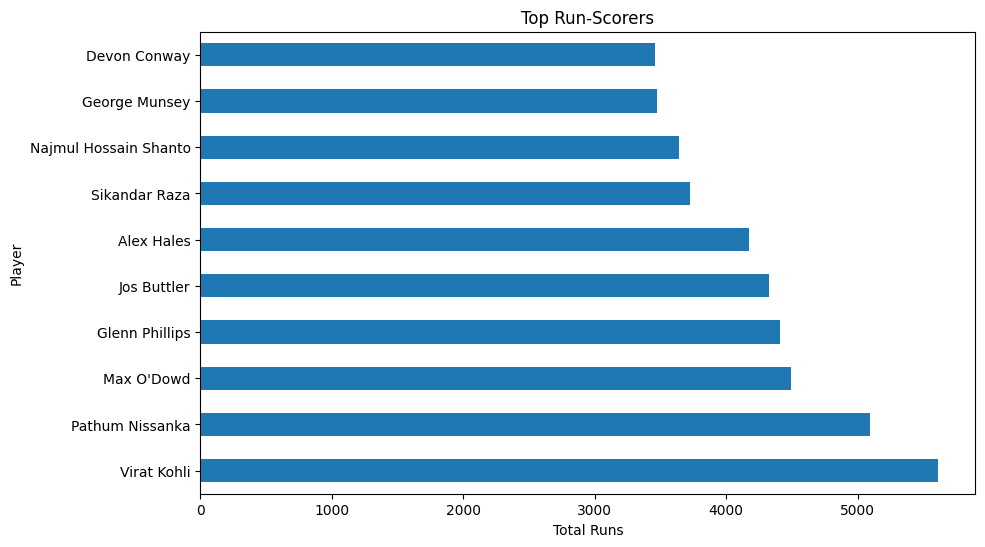

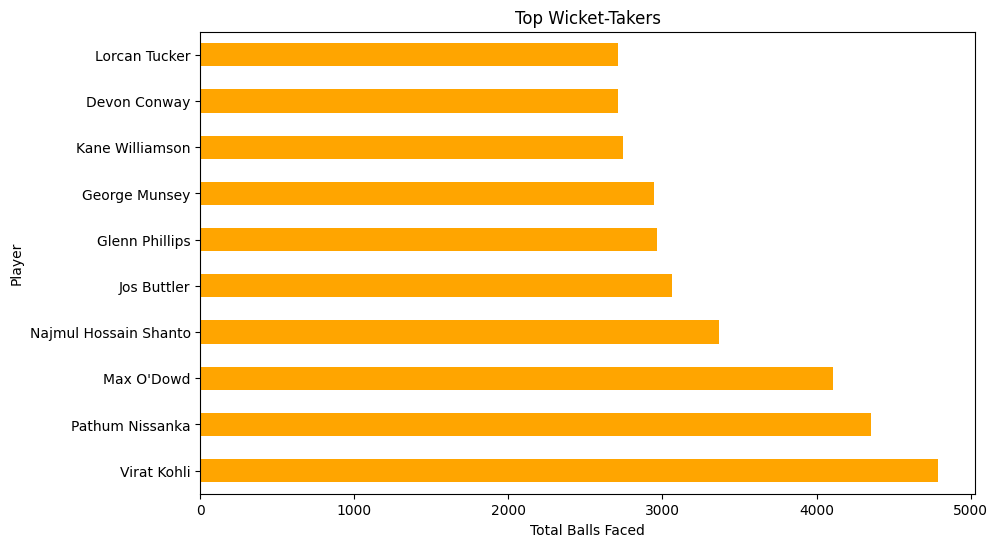

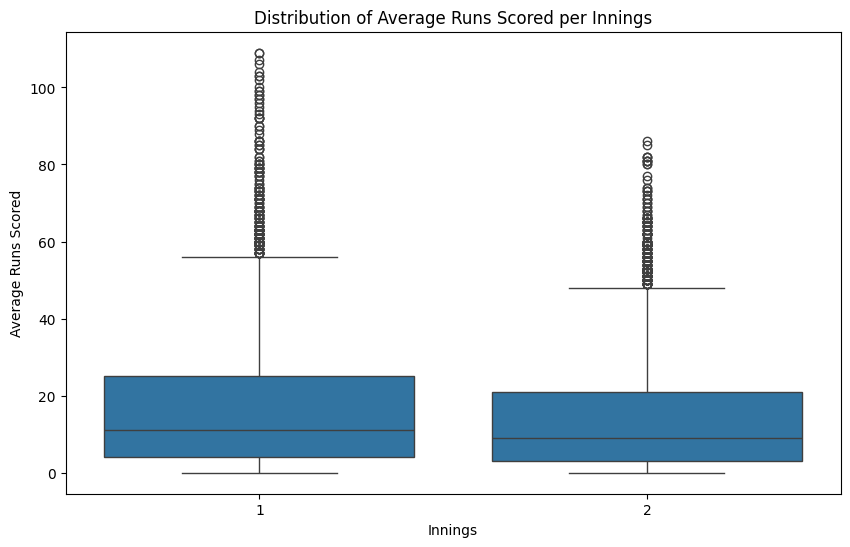

In [12]:
team_runs = df.groupby('home_team')['runs'].sum(
) + df.groupby('away_team')['runs'].sum()
plt.figure(figsize=(10, 6))
team_runs.plot(kind='bar')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='batsman1_runs', y='batsman1_balls', data=df)
plt.title('Runs vs Balls Faced for Players')
plt.xlabel('Runs')
plt.ylabel('Balls Faced')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='innings_id', y='runs', data=df)
plt.title('Runs Scored Over Each Over')
plt.xlabel('Over')
plt.ylabel('Runs')
plt.show()


plt.figure(figsize=(10, 6))
player_stats.sort_values(by='batsman1_runs', ascending=False).head(10)[
    'batsman1_runs'].plot(kind='barh')
plt.title('Top Run-Scorers')
plt.xlabel('Total Runs')
plt.ylabel('Player')
plt.show()

plt.figure(figsize=(10, 6))
player_stats.sort_values(by='batsman1_balls', ascending=False).head(10)[
    'batsman1_balls'].plot(kind='barh', color='orange')
plt.title('Top Wicket-Takers')
plt.xlabel('Total Balls Faced')
plt.ylabel('Player')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='innings_id', y='batsman1_runs', data=df)
plt.title('Distribution of Average Runs Scored per Innings')
plt.xlabel('Innings')
plt.ylabel('Average Runs Scored')
plt.show()